#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

### **Semana 8**
####**Curva ROC (Receiver Operating Characteristic)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from collections import Counter 

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_roc_curve, recall_score, roc_auc_score
from sklearn.metrics import RocCurveDisplay   

from sklearn.linear_model import LogisticRegression

https://www.kaggle.com/datasets/kumargh/pimaindiansdiabetescsv

In [2]:

mypath = "pima_indians_diabetes.csv"

data = pd.read_csv(mypath, sep=",", header='infer')
data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [3]:
X = data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
Y = data[['Outcome']]

In [4]:
Counter(Y['Outcome'])

Counter({1: 268, 0: 500})

In [5]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, train_size=0.7, random_state=7)

print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(537, 8)
(231, 8)
(537, 1)
(231, 1)


In [6]:
modelo_LR = LogisticRegression(max_iter=1000).fit(Xtrain, np.ravel(ytrain))
modelo_LR.score(Xtest,ytest)

0.7792207792207793

In [7]:
pred_bin = modelo_LR.predict(Xtest)

# ytest : etiquetas reales
# pred_bin : predicciones de mi modelo

cm = confusion_matrix(ytest, pred_bin)    # los renglones son los reales y las columnas las predicciones.
print(cm)

[[130  17]
 [ 34  50]]


In [8]:
pred = modelo_LR.predict_proba(Xtest)    # predicciones en formato probabilístico.
pred[0:5,:]  # la suma de los valores por renglón es 1. P.ej., un valor arriba de 0.5 es de la clase de esa coordenada
             # por lo que con solo una columna podemos seguir trabajando ya que son complementarias. 
             # En particular seleccionaremos más adelante la segunda columna y trabajaremos con ella:

array([[0.93287172, 0.06712828],
       [0.12244279, 0.87755721],
       [0.2488545 , 0.7511455 ],
       [0.85504632, 0.14495368],
       [0.62180708, 0.37819292]])

In [9]:
my0s = (ytest['Outcome']==0)   # Se genera el vector Booleano, my0s, con TRUE para las entradas con 0s y FALSE para los 1s. Buscamos quedarnos solo con los negativos.
my1s = (ytest['Outcome']==1)   # De manera complemtaria, ahora "my1s" es el vector Booleanco con TRUE para los 1s - FALSE para los 0s. Ahora buscamos solo los positivos.

print(my0s.shape)
print(sum(my0s))   # ambos suman el total del Test set.
print(sum(my1s))

(231,)
147
84


In [10]:
print(ytest[0:5])
print(my0s[0:5])

     Outcome
353        0
236        1
323        1
98         0
701        1
353     True
236    False
323    False
98      True
701    False
Name: Outcome, dtype: bool


###**Observa que para el caso de la clase 0, aún cuando el vector de predicciones pred0s tiene las probabilidades cercanas al 1 en la primer coordenada (o coordenada 0), nosotros seleccionamos la segunda coordenada (o coordenada 1) porque es el complemento que tiene los valores cercanos al 0. Y estos valores cercanos al 0 son los que se estarán graficando en el scatter plot. Para el caso de la clase 1 la misma segunda coordenada nos da directamente su probabilidad.**

In [11]:
pred[0:5,:]  # todas las predicciones...

array([[0.93287172, 0.06712828],
       [0.12244279, 0.87755721],
       [0.2488545 , 0.7511455 ],
       [0.85504632, 0.14495368],
       [0.62180708, 0.37819292]])

In [12]:
pred[my0s][0:5,:]    # solo las predicciones donde la primer coordenada es la que tiene etiqueta real 0.
              # Es decri, si el modelo hubiera quedado entrenado al 100% de accuracy, todas las 
              # primeras coordenadas debieran tener un valor de probabilidad mayor a la segunda coordenada.
              # Y así, las primeras coordenadas que veas menores a 0.5, serían errores de predicción,
              # estrictamente son FP. 

array([[0.93287172, 0.06712828],
       [0.85504632, 0.14495368],
       [0.92792772, 0.07207228],
       [0.05946838, 0.94053162],
       [0.86947277, 0.13052723]])

In [13]:
# pred : tamaño (231,2) con las probabilidades compelemtarias por renglón.

# Así, al seleccionar solo la segunda columna, queda automáticamente que cuando dicho valor es menor a 0.5, la podemos
# asociar ahora a la clase negativa y cuando sea mayor al 0.5 será de la clase positiva

pred0s  = pred[my0s][:,1]    # seleccionamos las probabilidades de nuestro modelo solo para los casos de etiquetas de 0s reales.
                             # Es decir, en teoría todos estos debieran ser probabilidades de predicción menores a 0.5.

pred1s  = pred[my1s][:,1]    # seleccionamos las probabilidades de nuestro modelo solo para los casos de etiquetas de 1s reales.
                             # Es decir, en teoría todos estos debieran ser predicciones de valores mayores a 0.5.

print(pred0s.shape)   
print(pred1s.shape)

(147,)
(84,)


In [14]:
print(pred1s.shape)
print(pred1s[0:5])     # En este caso, de las 5 primeras predicciones que debieron ser todas positivas,
                       # solo la primera y la quinta son correctas, y los tres de en medio son FN.

(84,)
[0.87755721 0.7511455  0.37819292 0.49697191 0.27258307]


###**Generemos una gráfica para visualizar mejor esta relación:**

In [15]:
r0 = np.random.uniform(-0.3,0.3, size=pred0s.shape[0])    # Generamos aleatorios uniforme para el eje x
                                                          # de longitud el total de 0-TRUEs en Xtest, entre
                                                          # algún intervalo deseado, que aquí usamos (-0.3, +0.3)

r1 = np.random.uniform(0.7,1.3, size=pred1s.shape[0])     # El análogo para 1-TRUEs de Xtest. Pero para que aparezcan
                                                          # cercanos uno al otro, seleccionemos ahora el intervalo (+0.7, +1.3)

print(r0.shape)
#print(r0[0:5])
print(r1.shape)
#print(r1[0:5])

(147,)
(84,)


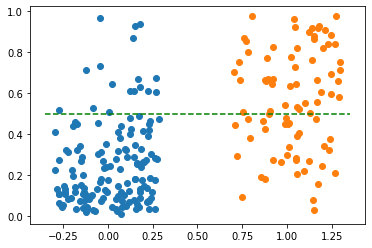

In [16]:
# En el gráfico los puntos azules son las predicciones de todos los registros negativos reales.
# Es decir, para un modelo perfecto, todos los puntos azules deberían haber quedado abajo de 0.5.

# La columna de los puntos anaranjados son todas las predicciones de los registros positivos reales.
# Es decir, en teoría todos estos puntos debieron haber quedado arriba del 0.5.

plt.scatter(x=r0, y=pred0s)   # En teoría todos estos debieran ser menores a 0.5.
plt.scatter(x=r1, y=pred1s)   # Y todos estos debieran ser mayores a 0.5.

plt.hlines(0.5, -0.35, 1.35, color='g', linestyles='dashed')   # el primer valor es la constante para "y" y los otros 2 son 
                                                               # donde inicia y termina en el eje horizontal.
plt.show()

In [17]:
# Cuando hacemos nuestras predicciones y obtenemos por ejemplo la matriz de confusión,
# de manera predeterminada se está considerando que 0.5 es el umbral para las clases negativa y positiva.

pred_bin = modelo_LR.predict(Xtest)
cm = confusion_matrix(ytest, pred_bin)    # los renglones son los reales y las columnas las predicciones.
print(cm)

tt = np.sum(cm)
print('real-0: [%.3f, %.3f]' % (cm[0,0]/tt, cm[0,1]/tt))
print('real-1: [%.3f, %.3f]' % (cm[1,0]/tt, cm[1,1]/tt))

[[130  17]
 [ 34  50]]
real-0: [0.563, 0.074]
real-1: [0.147, 0.216]


In [18]:
TPrate = cm[1,1]/(cm[1,0]+cm[1,1])
FPrate = cm[0,1]/(cm[0,0]+cm[0,1])
print('TP_rate-recall:%.5f' % TPrate)
print('FP_rate:%.5f' % FPrate)

TP_rate-recall:0.59524
FP_rate:0.11565


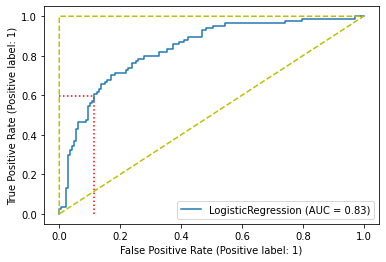

In [19]:
RocCurveDisplay.from_estimator(modelo_LR, Xtest, ytest)
plt.plot([0,0,1,0],[0,1,1,0], 'y--')
plt.hlines(TPrate, 0, FPrate, colors='r', linestyles='dotted')  # Se calcula TPrate y FPrate con base a threshold=0.5
plt.vlines(FPrate, 0, TPrate, colors='r', linestyles='dotted')  # Pero el mejor umbral para que ambos errores estén lo más equilibrados
plt.show()                                                      # es el que se calcula con el círculo centrado en (0,1).

###**Ajustando para un mejor threshold**

In [20]:
# regresa los TP para un umbral deseado:

def fun_thTPrate(th, modelo, x, y):   
  p = modelo.predict_proba(x)   # shape (231x2)
  my1s = (y['Outcome']==1) 
  pred1s  = p[my1s][:,1]
  return sum(pred1s > th) / sum(my1s)

In [21]:
fun_thTPrate(0.5, modelo_LR, Xtest, ytest)  # validando nuestra función con th=0.5

0.5952380952380952

In [22]:
# Análogo ahora con los FP:

def fun_thFPrate(th, modelo, x, y):   
  p = modelo.predict_proba(x)
  my0s = (y['Outcome']==0) 
  pred0s  = p[my0s][:,1]
  return sum(pred0s>th) / sum(my0s)

In [23]:
fun_thFPrate(0.5, modelo_LR, Xtest, ytest)   # validando nuestra función con th=0.5

0.11564625850340136

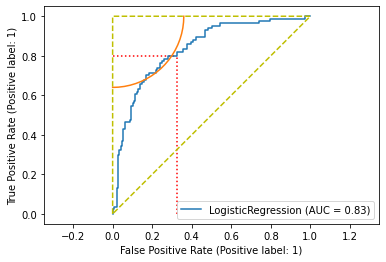

In [24]:
# En este gráfico trata de modificar los valores del umbral deseado "new_th" 
# y el valor del radio "rr", de manera que el círculo quede tangente a la ROC-curve 
# y el nodo del rectángulo naranja coincidan, aproximadamente. 

# Si ambos errores, FP y FN son igual de costosos, esta coincidencia del nodo y 
# el círculo equilibra "aproximadamente" ambos errores a su mínimo conjunto.


new_th = 0.3 # búsquda del mejor umbral que minimiza el total FP+FN.
rr = 0.36   # búsqueda del mejor radio

new_TPrate = fun_thTPrate(new_th, modelo_LR, Xtest, ytest)
new_FPrate = fun_thFPrate(new_th, modelo_LR, Xtest, ytest)

RocCurveDisplay.from_estimator(modelo_LR, Xtest, ytest)
plt.plot([0,0,1,0],[0,1,1,0], 'y--')
plt.hlines(new_TPrate, 0, new_FPrate, colors='r', linestyles='dotted')  
plt.vlines(new_FPrate, 0, new_TPrate, colors='r', linestyles='dotted')  

# graficando el pedazo de cícrulo:
an = np.linspace(1.5*np.pi, 2*np.pi, 20)
plt.plot(rr*np.cos(an), rr*np.sin(an)+1)
plt.axis('equal')
plt.show()   

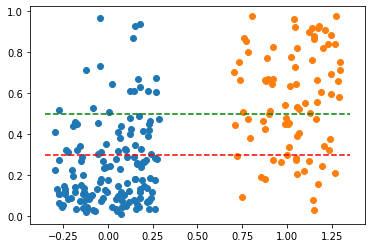

In [25]:
plt.scatter(x=r0, y=pred0s)
plt.scatter(x=r1, y=pred1s)
plt.hlines(0.5, -0.35,1.35,color='g',linestyles='dashed')
plt.hlines(new_th, -0.35,1.35,color='r',linestyles='dashed')
plt.show()

###**Predicciones y Matriz de Confusión con el mejor Umbral (threshold):**

In [26]:
pred_pr = modelo_LR.predict_proba(Xtest)  # obtenemos primero las predicciones en formato probabilístico de 0 a 1. Este es vector 2D.
pred_pr = pred_pr[:,1]    # como comentamos, es suficiente quedarnos con las probabilidades de la segunda coordenada. Este ya es vector 1D.

# Y realizamos nuestras predicciones a la clase 0 y a la clase 1 con base al mejor umbral new_th encontrado:
pred_bin_newTh = pred_pr > new_th
pred_bin_05 = modelo_LR.predict(Xtest)

print('Casos donde FP y FN los consideramos igualmente costosos:\n')
print('Predicciones con el umbral predeterminado 0.5:')
cm05 = confusion_matrix(ytest, pred_bin_05)    # los renglones son los reales y las columnas las predicciones.
print(cm05)

print('\nPredicciones con un mejor umbral de %.2f:' % new_th)
cmTh = confusion_matrix(ytest, pred_bin_newTh)    
print(cmTh)


Casos donde FP y FN los consideramos igualmente costosos:

Predicciones con el umbral predeterminado 0.5:
[[130  17]
 [ 34  50]]

Predicciones con un mejor umbral de 0.30:
[[99 48]
 [17 67]]


#**Comparando modelos con ROC curves y AUC**

In [27]:
from sklearn.svm import SVC

In [28]:
modelo_SVM = SVC().fit(Xtrain, np.ravel(ytrain))
modelo_SVM.score(Xtest,ytest)

0.7532467532467533

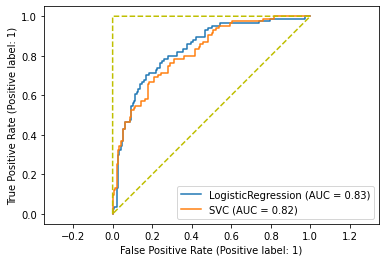

In [29]:
lr_curve = RocCurveDisplay.from_estimator(modelo_LR, Xtest, ytest)
svm_curve = RocCurveDisplay.from_estimator(modelo_SVM, Xtest, ytest, ax=lr_curve.ax_)

plt.plot([0,0,1,0],[0,1,1,0], 'y--')

 
plt.axis('equal')
plt.show() 

###**Fin del Jupyter-Notebook sobre la curva ROC - semana 8**